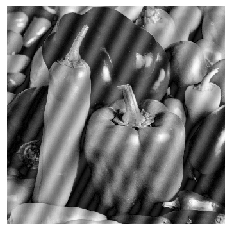

340 340 170 170
160 165 180 175


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv2.imread(r'..\img\peppers.bmp',0)
m, n = img.shape
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fmax = np.max(np.abs(fshift))
u0, v0 = m // 2, n // 2

u1 = u0 -10
v1 = v0 -5
fshift[v1, u1] = fmax / 5
u2 = u0 +10
v2 = v0 +5
fshift[v2, u2] = fmax / 5
f1 = np.fft.ifftshift(fshift)
img1 = abs(np.fft.ifft2(f1))   #重构图像
plt.imshow(img1, cmap = 'gray')  #显示滤波后幅值谱
plt.axis("off")
plt.show()
print(m,n,u0,v0)
print(u1,v1,u2,v2)

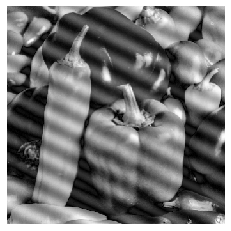

341 341 170 170
165 180 175 160


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv2.imread(r'..\img\peppers.bmp',0)
m, n = img.shape
if m%2==0:
    m=m+1
if n%2==0:
    n=n+1
img = cv2.resize(img, (m, n))
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fmax = np.max(np.abs(fshift))
u0, v0 = (m - 1) // 2, (n - 1) // 2

u1 = u0 -5
v1 = v0 + 10
fshift[v1, u1] = fmax / 5
u2 = m - 1 - u1
v2 = n - 1 - v1
fshift[v2, u2] = fmax / 5
f1 = np.fft.ifftshift(fshift)
img1 = abs(np.fft.ifft2(f1))   #重构图像
plt.imshow(img1, cmap = 'gray')  #显示滤波后幅值谱
plt.axis("off")
plt.show()
print(m,n,u0,v0)
print(u1,v1,u2,v2)


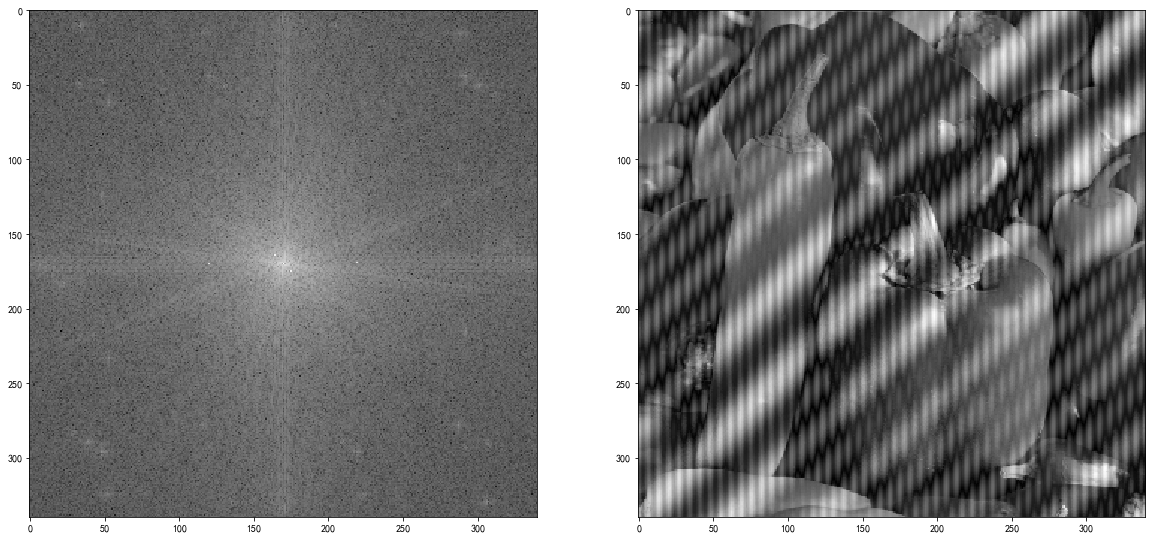

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv2.imread(r'..\img\peppers.bmp',0)
F = np.fft.fft2(img)
fshift0 = np.fft.fftshift(F)
G=fshift0.copy()
fmax=np.max(np.abs(fshift0))
m,n=F.shape
u0,v0=m//2,n//2  #图像中心
r1=50
u1=u0
v1=v0-r1
G[u1,v1]=fmax/5
u2=m-1-u1
v2=n-1-v1
G[u2,v2]=fmax/5
r1=5
u1=u0+r1
v1=v0+r1
G[u1,v1]=fmax/2
u2=m-1-u1
v2=n-1-v1
G[u2,v2]=fmax/2
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(20*np.log(1+abs(G)), cmap = 'gray')
f1 = np.fft.ifftshift(G)
img1 = abs(np.fft.ifft2(f1))   #重构图像
plt.subplot(122)
plt.imshow(img1, cmap = 'gray')  #显示滤波后幅值谱
# plt.imshow(np.abs(G),cmap="gray")
# plt.axis("off")
plt.show()



In [14]:
u1,v1,u0,v0,u2,v2

(159, 169, 169, 169, 179, 169)

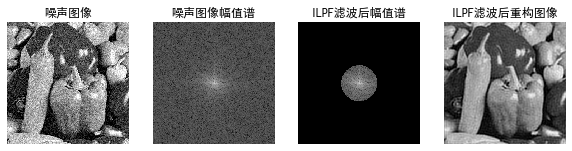

In [4]:
import cv2
import numpy as np
from math import *
import random
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负


def addGaussianNoise(src,means=0,sigma=0.1):
    NoiseImg=src/src.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(means,sigma)
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    return NoiseImg

img0 = cv2.imread(r'..\img\peppers.bmp',0)
img=addGaussianNoise(img0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum0 = 20*np.log(1+np.abs(fshift)) 
plt.figure(figsize=(10,5))
plt.subplot(141),plt.imshow(img, cmap = 'gray')  #显示加噪图像
plt.title('噪声图像'), plt.axis("off")
plt.subplot(142),plt.imshow(magnitude_spectrum0, cmap = 'gray')  #显示加噪图像
plt.title('噪声图像幅值谱')
plt.axis("off")
#进行理想低通滤波
r=50      #截止频率的设置
[m,n]=fshift.shape
H=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        d=sqrt((i-m/2)*(i-m/2)+(j-n/2)*(j-n/2))
        if d<r:
            H[i,j]= 1
G=H*fshift
magnitude_spectrum1 =20*np.log(1+np.abs(G))  #理想低通滤波后的幅值谱
f1 = np.fft.ifftshift(G)
img1 = abs(np.fft.ifft2(f1))   #重构图像
plt.subplot(143),plt.imshow(magnitude_spectrum1, cmap = 'gray')  #显示滤波后幅值谱
plt.title('ILPF滤波后幅值谱'), plt.axis("off")
plt.subplot(144),plt.imshow(img1, cmap = 'gray')  #显示重构图像
plt.title('ILPF滤波后重构图像'), plt.axis("off")
plt.show()


[[  4  30  29  45  48  45  29  30]
 [ 28  11  39  57  47  29  19  67]
 [ 28  33  36  24  34   4  19  55]
 [ 19  24  73  22  48  41  16   5]
 [  0  61  18  83 192  83  18  61]
 [ 19   5  16  41  48  22  73  24]
 [ 28  55  19   4  34  24  36  33]
 [ 28  67  19  29  47  57  39  11]]
4 4


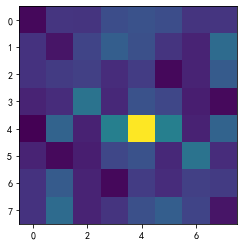

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img0 = cv2.imread(r'..\img\peppers.bmp',0)
img = img0[0:8,0:8]
m,n=img.shape
# if m%2==0:
#     m=m+1
# if n%2==0:
#     n=n+1
# img = cv2.resize(img, (m, n))
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fz=np.abs(fshift).astype(np.uint8)
print(fz)
plt.imshow(fz)
print(m//2,n//2)
plt.show()
# fmax = np.max(np.abs(fshift))
# u0, v0 = (m - 1) // 2, (n - 1) // 2

# u1 = u0 -5
# v1 = v0 + 10
# fshift[v1, u1] = fmax / 5
# u2 = m - 1 - u1
# v2 = n - 1 - v1
# fshift[v2, u2] = fmax / 5
# f1 = np.fft.ifftshift(fshift)
# img1 = abs(np.fft.ifft2(f1))   #重构图像
# plt.imshow(img1, cmap = 'gray')  #显示滤波后幅值谱
# plt.axis("off")
# plt.show()
# print(m,n,u0,v0)
# print(u1,v1,u2,v2)